In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. DATA PREPARATION

In [2]:
df = pd.read_csv("./test.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.values[:,1:]
Y = df.values[:,0]

In [5]:
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [6]:
# Each dataset/vector has 784 dimensions

In [7]:
# Training(80%) and Testing(20%)
split = int(0.80*X.shape[0])
X_Train , Y_Train = X[:split,:],Y[:split]
X_Test , Y_Test = X[split:,:],Y[split:]

In [8]:
print(X_Train.shape, Y_Train.shape)
print(X_Test.shape , Y_Test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


### Visualising some samples

In [9]:
def ImgShow(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

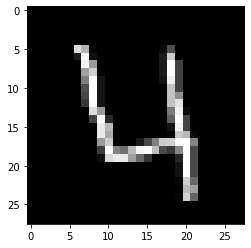

4


In [10]:
img = X_Train[3]
ImgShow(img)
print(Y_Train[3])

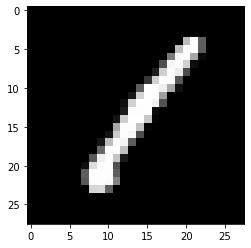

1


In [11]:
img = X_Train[0]
ImgShow(img)
print(Y_Train[0])

## Applying KNN

### Why KNN
- This algo is used to compare vectors
- Earlier we dealt with a 2d space
- but this time the images are of 28 X 28 => 784 dimensions
- Therefore clustering will take place accordingly and the concept
remains absolutely same

In [12]:
def dist(x1,x2):
    return (sum((x1-x2)**2))

In [13]:
def KNN(X,Y,query_x,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(X[i],query_x)
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    
    max_idx = new_vals[1].argmax()
    
    pred = new_vals[0][max_idx]
    
    return pred

## PREDICTION

In [14]:
print(KNN(X_Train,Y_Train,X_Test[0]))

0


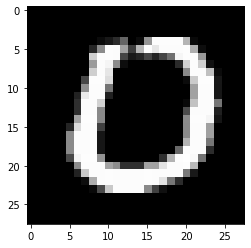

0


In [15]:
ImgShow(X_Test[0])
print(Y_Test[0])

In [16]:
print(KNN(X_Train,Y_Train,X_Test[1]))

7


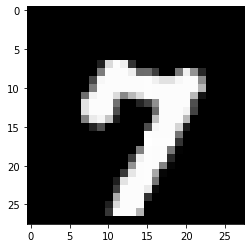

7


In [17]:
ImgShow(X_Test[1])
print(Y_Test[1])

## Accuracy of the method
- it takes a lot of time

In [ ]:
m = X_Test.shape[0]
total = m
count = 0
for i in range(m):
    knn = KNN(X_Train,Y_Train,X_Test[i])
    
    if knn == Y_Test[i]:
        count += 1
        
acc = (count/total)*100
print(acc)